In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('final_final.csv', index_col=0)

In [3]:
df[['real','imaginary','power','orientation']]

,real,imaginary,power,orientation
0,-10.0,-10.00,2,random
1,-10.0,-10.00,3,anticlockwise
2,-10.0,-10.00,4,random
3,-10.0,-10.00,5,random
4,-10.0,-9.99,2,random
...,...,...,...,...
4009999,-5.0,9.99,5,random
4010000,-5.0,10.00,2,clockwise
4010001,-5.0,10.00,3,random
4010002,-5.0,10.00,4,clockwise


In [4]:
import matplotlib.pyplot as plt

In [5]:
X_2_clockwise = np.array(df[(df['power']==2) & (df['orientation']=='clockwise')]['real'])
Y_2_clockwise = np.array(df[(df['power']==2) & (df['orientation']=='clockwise')]['imaginary'])
X_2_anticlockwise = np.array(df[(df['power']==2) & (df['orientation']=='anticlockwise')]['real'])
Y_2_anticlockwise = np.array(df[(df['power']==2) & (df['orientation']=='anticlockwise')]['imaginary'])


X_3_clockwise = np.array(df[(df['power']==3) & (df['orientation']=='clockwise')]['real'])
Y_3_clockwise = np.array(df[(df['power']==3) & (df['orientation']=='clockwise')]['imaginary'])
X_3_anticlockwise = np.array(df[(df['power']==3) & (df['orientation']=='anticlockwise')]['real'])
Y_3_anticlockwise = np.array(df[(df['power']==3) & (df['orientation']=='anticlockwise')]['imaginary'])


X_4_clockwise = np.array(df[(df['power']==4) & (df['orientation']=='clockwise')]['real'])
Y_4_clockwise = np.array(df[(df['power']==4) & (df['orientation']=='clockwise')]['imaginary'])
X_4_anticlockwise = np.array(df[(df['power']==4) & (df['orientation']=='anticlockwise')]['real'])
Y_4_anticlockwise = np.array(df[(df['power']==4) & (df['orientation']=='anticlockwise')]['imaginary'])


X_5_clockwise = np.array(df[(df['power']==5) & (df['orientation']=='clockwise')]['real'])
Y_5_clockwise = np.array(df[(df['power']==5) & (df['orientation']=='clockwise')]['imaginary'])
X_5_anticlockwise = np.array(df[(df['power']==5) & (df['orientation']=='anticlockwise')]['real'])
Y_5_anticlockwise = np.array(df[(df['power']==5) & (df['orientation']=='anticlockwise')]['imaginary'])

Text(0.5, 1.0, 'complex^(2)')

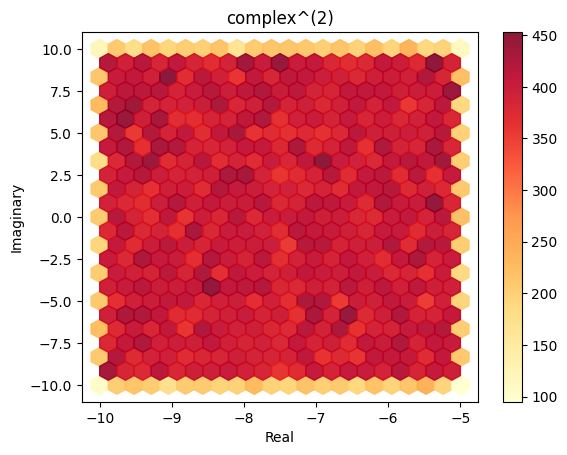

In [6]:
plt.hexbin(X_2_clockwise,Y_2_clockwise,gridsize=21, cmap='YlOrRd',alpha=.9)
plt.colorbar()
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('complex^(2)')
# print(len(Y_5_clockwise)*100/len(df))

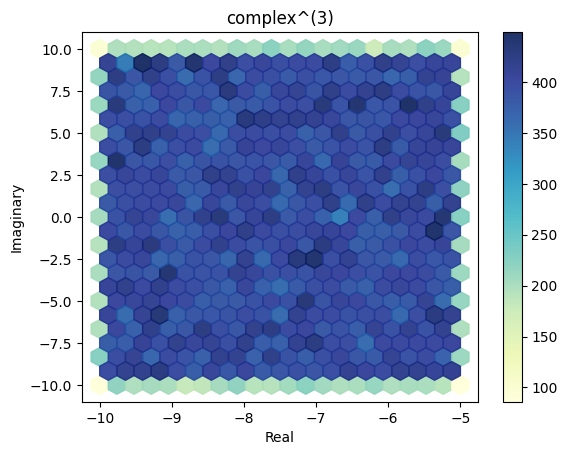

In [7]:
plt.hexbin(X_3_clockwise,Y_3_clockwise,gridsize=21, cmap='YlGnBu',alpha=0.9)
plt.colorbar()
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('complex^(3)')
plt.show()

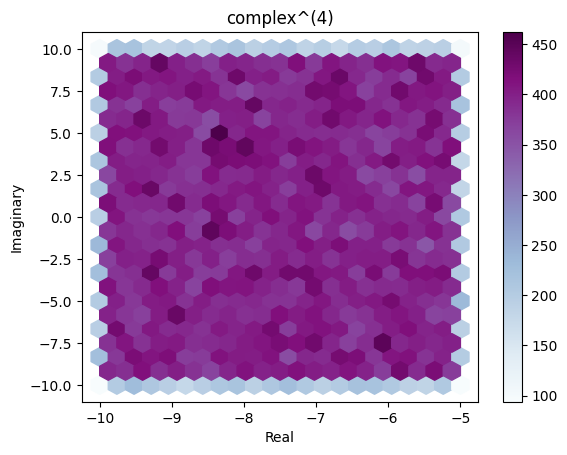

In [8]:
plt.hexbin(X_4_clockwise,Y_4_clockwise,gridsize=21, cmap='BuPu',alpha=1)
plt.colorbar()
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('complex^(4)')
plt.show()

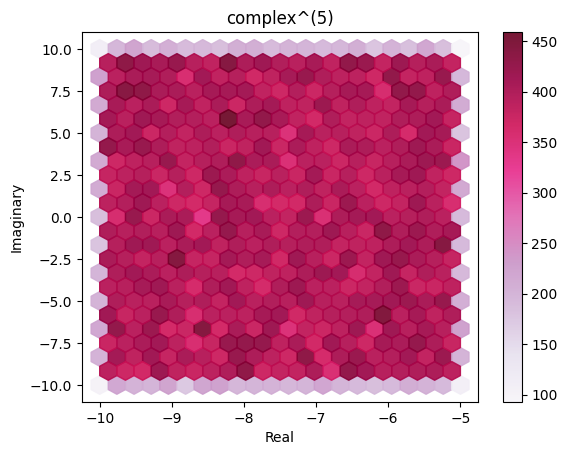

In [9]:
plt.hexbin(X_5_clockwise,Y_5_clockwise,gridsize=21, cmap='PuRd',alpha=0.9)
plt.colorbar()
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('complex^(5)')
plt.show()

In [10]:
X = df['real imaginary power'.split()]
y = df['orientation']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dt = DecisionTreeClassifier()

In [16]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
y_hat_dt = dt.predict(X_test)

In [18]:
print(classification_report(y_test, y_hat_dt))

               precision    recall  f1-score   support

anticlockwise       0.10      0.12      0.11    120912
    clockwise       0.20      0.21      0.21    240751
       random       0.70      0.67      0.68    841339

     accuracy                           0.52   1203002
    macro avg       0.33      0.33      0.33   1203002
 weighted avg       0.54      0.52      0.53   1203002



In [19]:
print(confusion_matrix(y_test, y_hat_dt))

[[ 13949  26117  80846]
 [ 27499  51746 161506]
 [ 95769 183188 562382]]


In [29]:
print(f1_score(y_test,y_hat_dt,average='weighted'))

0.530014644228448


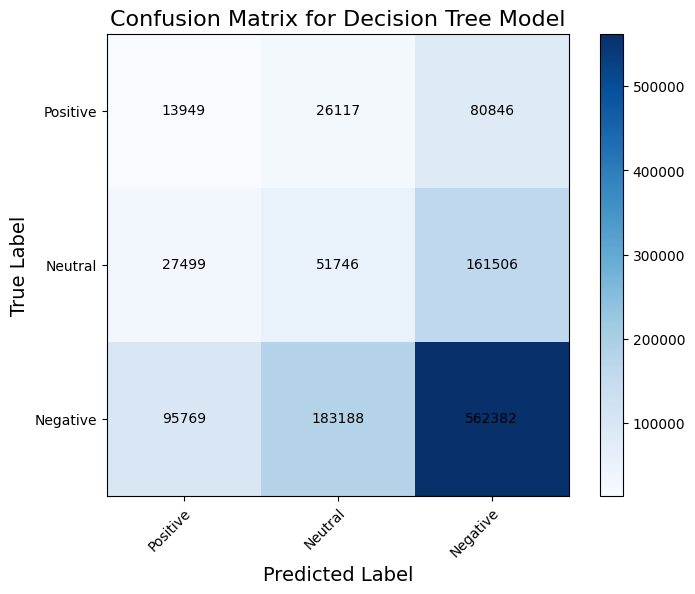

In [30]:
confusion_decision_tree = np.array(confusion_matrix(y_test, y_hat_dt))

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(confusion_decision_tree, cmap='Blues')
for i in range(3):
    for j in range(3):
        text = ax.text(j, i, confusion_decision_tree[i, j], ha='center', va='center', color='k')

cbar = ax.figure.colorbar(im, ax=ax)
ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(3))
ax.set_xticklabels(['Positive', 'Neutral', 'Negative'])
ax.set_yticklabels(['Positive', 'Neutral', 'Negative'])
ax.set_xlabel('Predicted Label', fontsize=14)
ax.set_ylabel('True Label', fontsize=14)
ax.set_title('Confusion Matrix for Decision Tree Model', fontsize=16)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
plt.show()

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
kn = KNeighborsClassifier(n_neighbors=int(np.sqrt(X_train.shape[0])), n_jobs=-1)

In [33]:
kn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=1675)

In [34]:
y_hat_kn = kn.predict(X_test)

In [35]:
print(classification_report(y_test, y_hat_kn))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

anticlockwise       0.00      0.00      0.00    120912
    clockwise       0.00      0.00      0.00    240751
       random       0.70      1.00      0.82    841339

     accuracy                           0.70   1203002
    macro avg       0.23      0.33      0.27   1203002
 weighted avg       0.49      0.70      0.58   1203002



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
print(confusion_matrix(y_test, y_hat_kn))

[[     0      0 120912]
 [     0      0 240751]
 [     0      0 841339]]


In [37]:
print(f1_score_score_score_score(y_test,y_hat_kn,average='weighted'))

0.5756418358477422


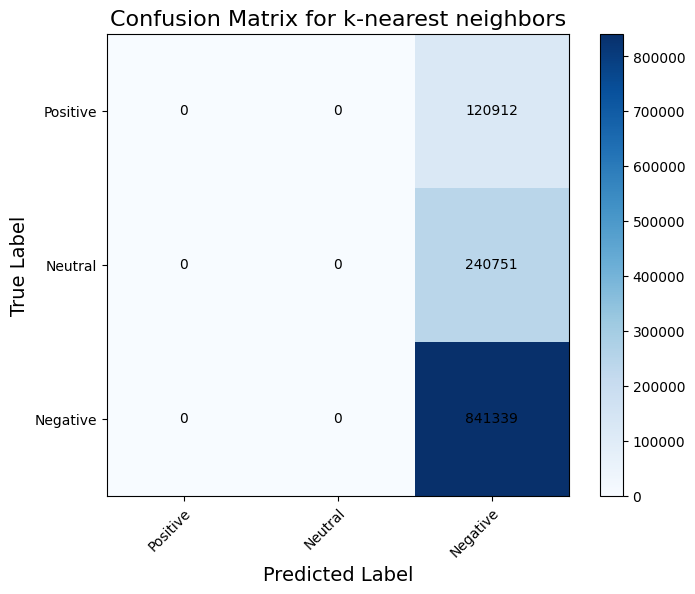

In [38]:
confusion_KNeighbor = np.array(confusion_matrix(y_test, y_hat_kn))

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(confusion_KNeighbor, cmap='Blues')
for i in range(3):
    for j in range(3):
        text = ax.text(j, i, confusion_KNeighbor[i, j], ha='center', va='center', color='k')

cbar = ax.figure.colorbar(im, ax=ax)
ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(3))
ax.set_xticklabels(['Positive', 'Neutral', 'Negative'])
ax.set_yticklabels(['Positive', 'Neutral', 'Negative'])
ax.set_xlabel('Predicted Label', fontsize=14)
ax.set_ylabel('True Label', fontsize=14)
ax.set_title('Confusion Matrix for k-nearest neighbors', fontsize=16)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
plt.show()

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf = RandomForestClassifier(n_jobs=-1, verbose=1)

In [41]:
rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished


RandomForestClassifier(n_jobs=-1, verbose=1)

In [42]:
y_hat_rf = rf.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   11.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:   29.6s finished


In [43]:
print(classification_report(y_test, y_hat_rf))

               precision    recall  f1-score   support

anticlockwise       0.10      0.06      0.08    120912
    clockwise       0.20      0.14      0.17    240751
       random       0.70      0.79      0.74    841339

     accuracy                           0.59   1203002
    macro avg       0.33      0.33      0.33   1203002
 weighted avg       0.54      0.59      0.56   1203002



In [44]:
print(confusion_matrix(y_test, y_hat_rf))

[[  7747  17595  95570]
 [ 15009  34387 191355]
 [ 52825 120827 667687]]


In [45]:
print(f1_score(y_test,y_hat_rf,average='weighted'))

0.5612173778288319


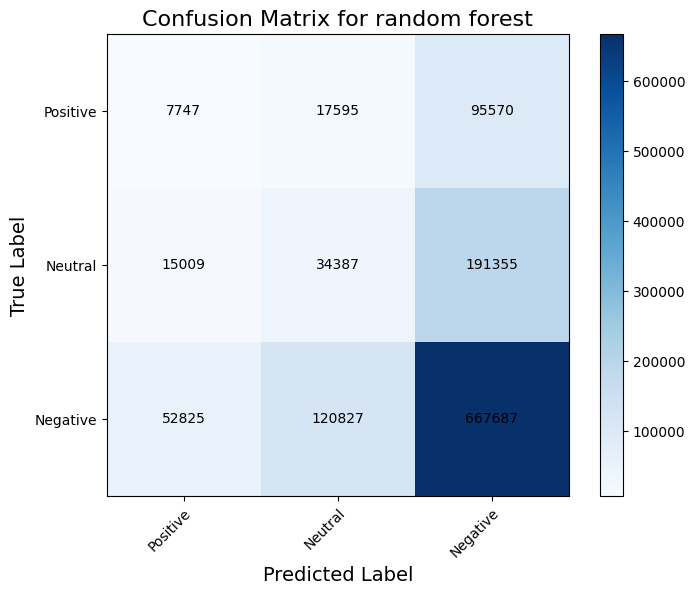

In [46]:
confusion_random_forest = np.array(confusion_matrix(y_test, y_hat_rf))

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(confusion_random_forest, cmap='Blues')
for i in range(3):
    for j in range(3):
        text = ax.text(j, i, confusion_random_forest[i, j], ha='center', va='center', color='k')

cbar = ax.figure.colorbar(im, ax=ax)
ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(3))
ax.set_xticklabels(['Positive', 'Neutral', 'Negative'])
ax.set_yticklabels(['Positive', 'Neutral', 'Negative'])
ax.set_xlabel('Predicted Label', fontsize=14)
ax.set_ylabel('True Label', fontsize=14)
ax.set_title('Confusion Matrix for random forest', fontsize=16)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
plt.show()